# Lab 4

## import libs and connect to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [88]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [89]:
cur=conn.cursor()

## q1

In [5]:
sql_q1 = """
            select * from gp21.student
            """

In [6]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA


## q2

In [7]:
sql_q2 = """
        select gp21.professor.p_name,
        gp21.course.c_name
        from gp21.professor
        inner join gp21.course
        on gp21.professor.p_email = gp21.course.p_email
        """

In [9]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,data mining
1,Timothy Walton,hypothesis testing
2,Kathleen Moore,technology applications in a networked world
3,new_p,new_c_name
4,new_p,software development


## q3

In [10]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp21.enroll_list
        group by c_number
        order by enrolled desc
        """

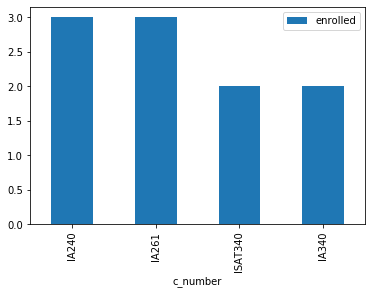

In [11]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [12]:
sql_q4 = """
        select gp21.professor.p_name,
        count(gp21.course.c_name) as teaching_number
        from gp21.professor
        inner join gp21.course
        on gp21.professor.p_email = gp21.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

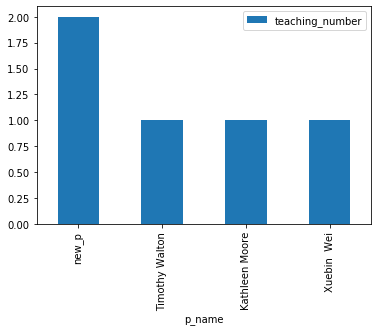

In [13]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [61]:
sql_q5_professor = """
                    insert into gp21.professor(p_email, p_name, office)
                    values('{}','{}','{}')
                    """.format('newp@jmu.edu','new_p','news_office')

In [65]:
cur.execute(sql_q5_professor)

In [66]:
conn.commit()

In [67]:
df=pandas.read_sql_query('select * from gp21.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,ISAT112
1,waltontr@jmu.edu,Timothy Walton,ISAT326\n
2,moore8ka@jmu.edu,Kathleen Moore,ISAT116
3,new_p@jmu.edu,new_p,new_office
4,newp@jmu.edu,new_p,news_office


In [90]:
sql_q5_course = """
                    insert into gp21.course(c_number, c_name, room, p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new_new','new_c_name','online','new_p@jmu.edu')

In [91]:
cur.execute(sql_q5_course)

In [92]:
conn.commit()

In [93]:
df=pandas.read_sql_query('select * from gp21.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA340,data mining,online,weixx@jmu.edu
1,IA261,hypothesis testing,online,waltontr@jmu.edu
2,IA240,technology applications in a networked world,online,moore8ka@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,ISAT340,software development,online,new_p@jmu.edu
5,ia_new_new,new_c_name,online,new_p@jmu.edu


## q6

In [94]:
sql_q6_course = """
                update gp21.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [95]:
cur.execute(sql_q6_course)

In [96]:
conn.commit()

In [97]:
df=pandas.read_sql_query('select * from gp21.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,ISAT112
1,waltontr@jmu.edu,Timothy Walton,ISAT326\n
2,moore8ka@jmu.edu,Kathleen Moore,ISAT116
3,new_p@jmu.edu,new_p,new_office
4,newp@jmu.edu,new_p,news_office


In [98]:
sql_q6_professor = """
                    delete from gp21.professor
                    where p_email = '{}'
                    """.format('weixx@jmu.edu')

In [99]:
cur.execute(sql_q6_professor)

In [100]:
conn.commit()

In [101]:
df = pandas.read_sql_query('select * from gp21.professor', conn)
df[:]

,p_email,p_name,office
0,waltontr@jmu.edu,Timothy Walton,ISAT326\n
1,moore8ka@jmu.edu,Kathleen Moore,ISAT116
2,new_p@jmu.edu,new_p,new_office
3,newp@jmu.edu,new_p,news_office


## close connection

In [102]:
cur.close()
conn.close()